In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import seaborn as sns

path = 'c:/Windows/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
rc('font', family=font_name)

%matplotlib inline

In [2]:
import os
os.getcwd()
os.chdir(r"C:\Users\User\Datamining Project\SkillCraft2")

In [8]:
data = pd.read_csv('StarCraft2ReplayAnalysis.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   float64
 6   SelectByHotkeys     3395 non-null   float64
 7   AssignToHotkeys     3395 non-null   float64
 8   UniqueHotkeys       3395 non-null   float64
 9   MinimapAttacks      3395 non-null   float64
 10  MinimapRightClicks  3395 non-null   float64
 11  NumberOfPACs        3395 non-null   float64
 12  GapBetweenPACs      3395 non-null   float64
 13  ActionLatency       3395 non-null   float64
 14  ActionsInPAC        3395 non-null   float64
 15  TotalMapExplored    3395 non-null   float64
 16  Worker

In [9]:
data.loc[:,data.columns[6:12]]

,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs
0,0.003515,0.000220,0.000055,0.000110,0.000392,0.004849
1,0.003304,0.000259,0.000069,0.000294,0.000432,0.004307
2,0.001101,0.000336,0.000042,0.000294,0.000461,0.002926
3,0.001034,0.000213,0.000011,0.000053,0.000543,0.003783
4,0.001136,0.000327,0.000039,0.000000,0.001329,0.002368
...,...,...,...,...,...,...
3390,0.020425,0.000743,0.000110,0.000621,0.000146,0.004555
3391,0.028043,0.001157,0.000246,0.000246,0.001083,0.004259
3392,0.028341,0.000860,0.000108,0.000338,0.000169,0.004439
3393,0.036436,0.000594,0.000093,0.000204,0.000780,0.004346


In [10]:
data.loc[:,data.columns[15:20]]

,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed
0,0.000220,0.001397,0.000047,0.000000,0.000000
1,0.000381,0.001194,0.000087,0.000000,0.000208
2,0.000231,0.000745,0.000063,0.000000,0.000189
3,0.000202,0.000426,0.000075,0.000000,0.000384
4,0.000289,0.001174,0.000077,0.000000,0.000019
...,...,...,...,...,...
3390,0.000560,0.000877,0.000061,0.000000,0.000000
3391,0.000394,0.000788,0.000098,0.000000,0.000000
3392,0.000292,0.001260,0.000061,0.000000,0.000000
3393,0.000279,0.000613,0.000111,0.000000,0.000631


In [11]:
data.loc[:,data.columns[12:14]]

,GapBetweenPACs,ActionLatency
0,32.6677,40.8673
1,32.9194,42.3454
2,44.6475,75.3548
3,29.2203,53.7352
4,22.6885,62.0813
...,...,...
3390,18.6059,42.8342
3391,14.3023,36.1156
3392,12.4028,39.5156
3393,11.6910,34.8547


# 1. 초변환

In [12]:
data.loc[:,data.columns[6:12]] = data.loc[:,data.columns[6:12]]*88.5
data.loc[:,data.columns[15:20]] = data.loc[:,data.columns[15:20]]*88.5
data.loc[:,data.columns[12:14]] = data.loc[:,data.columns[12:14]] / 1000

In [13]:
data.loc[:,data.columns[6:12]]

,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs
0,0.311092,0.019443,0.004859,0.009722,0.034720,0.429140
1,0.292387,0.022962,0.006124,0.026024,0.038271,0.381175
2,0.097447,0.029698,0.003708,0.025986,0.040835,0.258929
3,0.091468,0.018859,0.000947,0.004717,0.048092,0.334756
4,0.100537,0.028968,0.003407,0.000000,0.117577,0.209594
...,...,...,...,...,...,...
3390,1.807640,0.065752,0.009701,0.054973,0.012935,0.403135
3391,2.481818,0.102410,0.021789,0.021789,0.095874,0.376957
3392,2.508180,0.076129,0.009516,0.029908,0.014954,0.392880
3393,3.224577,0.052592,0.008222,0.018079,0.069028,0.384583


In [14]:
data.loc[:,data.columns[15:20]]

,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed
0,0.019443,0.123599,0.004168,0.000000,0.000000
1,0.033678,0.105625,0.007655,0.000000,0.018370
2,0.020417,0.065893,0.005567,0.000000,0.016705
3,0.017916,0.037719,0.006602,0.000000,0.033947
4,0.025560,0.103943,0.006815,0.000000,0.001708
...,...,...,...,...,...
3390,0.049583,0.077609,0.005390,0.000000,0.000000
3391,0.034863,0.069726,0.008717,0.000000,0.000000
3392,0.025830,0.111475,0.005434,0.000000,0.000000
3393,0.024653,0.054236,0.009861,0.000000,0.055880


In [15]:
data.loc[:,data.columns[12:14]]

,GapBetweenPACs,ActionLatency
0,0.032668,0.040867
1,0.032919,0.042345
2,0.044647,0.075355
3,0.029220,0.053735
4,0.022689,0.062081
...,...,...
3390,0.018606,0.042834
3391,0.014302,0.036116
3392,0.012403,0.039516
3393,0.011691,0.034855


# 2. 중복행 제거

In [18]:
data.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp'],
      dtype='object')

In [19]:
sub_col = ['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp']

In [20]:
data[data.duplicated(subset = sub_col,keep=False)]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
1401,4064,5,25.0,20.0,700.0,95.5704,0.167685,0.029345,0.005239,0.040873,...,0.285065,0.035336,0.063309,5.1618,0.019913,0.064978,0.005239,0.029345,0.045065,84444
1409,4075,5,25.0,20.0,700.0,95.5704,0.167685,0.029345,0.005239,0.040873,...,0.285065,0.035336,0.063309,5.1618,0.019913,0.064978,0.005239,0.029345,0.045065,84444


In [21]:
data.drop_duplicates(subset=sub_col, keep='first', inplace=True, ignore_index=True)
data

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.311092,0.019443,0.004859,0.009722,...,0.429140,0.032668,0.040867,4.7508,0.019443,0.123599,0.004168,0.000000,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.292387,0.022962,0.006124,0.026024,...,0.381175,0.032919,0.042345,4.8434,0.033678,0.105625,0.007655,0.000000,0.018370,57812
2,56,4,30.0,10.0,200.0,69.9612,0.097447,0.029698,0.003708,0.025986,...,0.258929,0.044647,0.075355,4.0430,0.020417,0.065893,0.005567,0.000000,0.016705,95360
3,57,3,19.0,20.0,400.0,107.6016,0.091468,0.018859,0.000947,0.004717,...,0.334756,0.029220,0.053735,4.9155,0.017916,0.037719,0.006602,0.000000,0.033947,93852
4,58,3,32.0,10.0,500.0,122.8908,0.100537,0.028968,0.003407,0.000000,...,0.209594,0.022689,0.062081,9.3740,0.025560,0.103943,0.006815,0.000000,0.001708,51936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,10089,8,NaN,NaN,NaN,259.6296,1.807640,0.065752,0.009701,0.054973,...,0.403135,0.018606,0.042834,6.2754,0.049583,0.077609,0.005390,0.000000,0.000000,82104
3390,10090,8,NaN,NaN,NaN,314.6700,2.481818,0.102410,0.021789,0.021789,...,0.376957,0.014302,0.036116,7.1965,0.034863,0.069726,0.008717,0.000000,0.000000,40616
3391,10092,8,NaN,NaN,NaN,299.4282,2.508180,0.076129,0.009516,0.029908,...,0.392880,0.012403,0.039516,6.3979,0.025830,0.111475,0.005434,0.000000,0.000000,65100
3392,10094,8,NaN,NaN,NaN,375.8664,3.224577,0.052592,0.008222,0.018079,...,0.384583,0.011691,0.034855,7.9615,0.024653,0.054236,0.009861,0.000000,0.055880,53848


# 3. 이상치 제거

In [23]:
df_cut_max = data[(data['TotalHours'] != data['TotalHours'].max()) & (data['TotalHours'] != 0) ]
df_cut_max

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.311092,0.019443,0.004859,0.009722,...,0.429140,0.032668,0.040867,4.7508,0.019443,0.123599,0.004168,0.000000,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.292387,0.022962,0.006124,0.026024,...,0.381175,0.032919,0.042345,4.8434,0.033678,0.105625,0.007655,0.000000,0.018370,57812
2,56,4,30.0,10.0,200.0,69.9612,0.097447,0.029698,0.003708,0.025986,...,0.258929,0.044647,0.075355,4.0430,0.020417,0.065893,0.005567,0.000000,0.016705,95360
3,57,3,19.0,20.0,400.0,107.6016,0.091468,0.018859,0.000947,0.004717,...,0.334756,0.029220,0.053735,4.9155,0.017916,0.037719,0.006602,0.000000,0.033947,93852
4,58,3,32.0,10.0,500.0,122.8908,0.100537,0.028968,0.003407,0.000000,...,0.209594,0.022689,0.062081,9.3740,0.025560,0.103943,0.006815,0.000000,0.001708,51936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,10089,8,NaN,NaN,NaN,259.6296,1.807640,0.065752,0.009701,0.054973,...,0.403135,0.018606,0.042834,6.2754,0.049583,0.077609,0.005390,0.000000,0.000000,82104
3390,10090,8,NaN,NaN,NaN,314.6700,2.481818,0.102410,0.021789,0.021789,...,0.376957,0.014302,0.036116,7.1965,0.034863,0.069726,0.008717,0.000000,0.000000,40616
3391,10092,8,NaN,NaN,NaN,299.4282,2.508180,0.076129,0.009516,0.029908,...,0.392880,0.012403,0.039516,6.3979,0.025830,0.111475,0.005434,0.000000,0.000000,65100
3392,10094,8,NaN,NaN,NaN,375.8664,3.224577,0.052592,0.008222,0.018079,...,0.384583,0.011691,0.034855,7.9615,0.024653,0.054236,0.009861,0.000000,0.055880,53848


In [24]:
df_cut_max = df_cut_max[(df_cut_max['HoursPerWeek'] != df_cut_max['HoursPerWeek'].max()) & (df_cut_max['HoursPerWeek'] != 0)]
df_cut_max

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.311092,0.019443,0.004859,0.009722,...,0.429140,0.032668,0.040867,4.7508,0.019443,0.123599,0.004168,0.000000,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.292387,0.022962,0.006124,0.026024,...,0.381175,0.032919,0.042345,4.8434,0.033678,0.105625,0.007655,0.000000,0.018370,57812
2,56,4,30.0,10.0,200.0,69.9612,0.097447,0.029698,0.003708,0.025986,...,0.258929,0.044647,0.075355,4.0430,0.020417,0.065893,0.005567,0.000000,0.016705,95360
3,57,3,19.0,20.0,400.0,107.6016,0.091468,0.018859,0.000947,0.004717,...,0.334756,0.029220,0.053735,4.9155,0.017916,0.037719,0.006602,0.000000,0.033947,93852
4,58,3,32.0,10.0,500.0,122.8908,0.100537,0.028968,0.003407,0.000000,...,0.209594,0.022689,0.062081,9.3740,0.025560,0.103943,0.006815,0.000000,0.001708,51936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,10089,8,NaN,NaN,NaN,259.6296,1.807640,0.065752,0.009701,0.054973,...,0.403135,0.018606,0.042834,6.2754,0.049583,0.077609,0.005390,0.000000,0.000000,82104
3390,10090,8,NaN,NaN,NaN,314.6700,2.481818,0.102410,0.021789,0.021789,...,0.376957,0.014302,0.036116,7.1965,0.034863,0.069726,0.008717,0.000000,0.000000,40616
3391,10092,8,NaN,NaN,NaN,299.4282,2.508180,0.076129,0.009516,0.029908,...,0.392880,0.012403,0.039516,6.3979,0.025830,0.111475,0.005434,0.000000,0.000000,65100
3392,10094,8,NaN,NaN,NaN,375.8664,3.224577,0.052592,0.008222,0.018079,...,0.384583,0.011691,0.034855,7.9615,0.024653,0.054236,0.009861,0.000000,0.055880,53848


In [27]:
df_cut_max = df_cut_max[df_cut_max['TotalHours'] >= df_cut_max['TotalHours'].quantile(0.05)]
df_cut_max

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.311092,0.019443,0.004859,0.009722,...,0.429140,0.032668,0.040867,4.7508,0.019443,0.123599,0.004168,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.292387,0.022962,0.006124,0.026024,...,0.381175,0.032919,0.042345,4.8434,0.033678,0.105625,0.007655,0.0,0.018370,57812
2,56,4,30.0,10.0,200.0,69.9612,0.097447,0.029698,0.003708,0.025986,...,0.258929,0.044647,0.075355,4.0430,0.020417,0.065893,0.005567,0.0,0.016705,95360
3,57,3,19.0,20.0,400.0,107.6016,0.091468,0.018859,0.000947,0.004717,...,0.334756,0.029220,0.053735,4.9155,0.017916,0.037719,0.006602,0.0,0.033947,93852
4,58,3,32.0,10.0,500.0,122.8908,0.100537,0.028968,0.003407,0.000000,...,0.209594,0.022689,0.062081,9.3740,0.025560,0.103943,0.006815,0.0,0.001708,51936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,9261,4,20.0,8.0,400.0,158.1390,1.223907,0.044646,0.005390,0.019244,...,0.317138,0.036399,0.066272,4.5097,0.023093,0.091597,0.005390,0.0,0.025402,114972
3335,9264,5,16.0,56.0,1500.0,186.1320,0.615128,0.031859,0.007354,0.007354,...,0.479114,0.022861,0.034742,4.9309,0.046563,0.118856,0.008576,0.0,0.034310,72224
3336,9265,4,21.0,8.0,100.0,121.6992,0.261605,0.021316,0.007753,0.004841,...,0.326522,0.035583,0.057959,5.4154,0.022285,0.178283,0.006779,0.0,0.000000,91340
3337,9270,3,20.0,28.0,400.0,134.2848,0.479980,0.016076,0.005744,0.000000,...,0.283624,0.018293,0.062462,6.0202,0.020669,0.082676,0.005744,0.0,0.000000,77072


# 4. 로그 변환

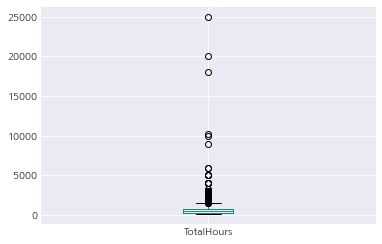

In [29]:
df_cut_max[['TotalHours']].boxplot()

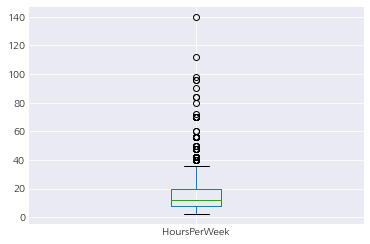

In [30]:
df_cut_max[['HoursPerWeek']].boxplot()

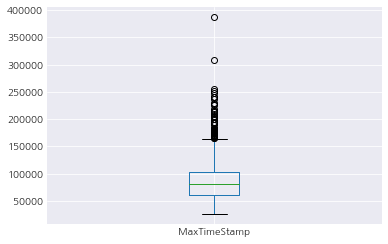

In [31]:
df_cut_max[['MaxTimeStamp']].boxplot()

In [32]:
df_cut_max['TotalHours'] = np.log1p(df_cut_max['TotalHours'])
df_cut_max['HoursPerWeek'] = np.log1p(df_cut_max['HoursPerWeek'])
df_cut_max['MaxTimeStamp'] = np.log1p(df_cut_max['MaxTimeStamp'])


C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

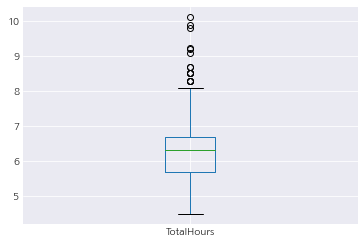

In [33]:
df_cut_max[['TotalHours']].boxplot()

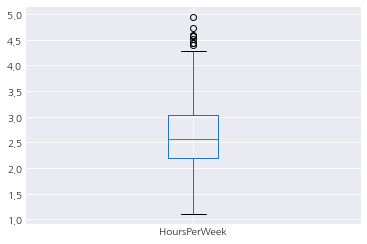

In [34]:
df_cut_max[['HoursPerWeek']].boxplot()

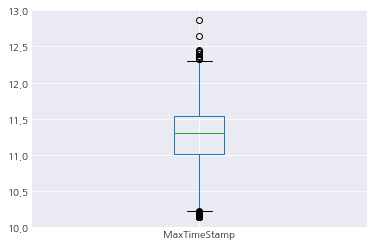

In [35]:
df_cut_max[['MaxTimeStamp']].boxplot()

# 5. 결측치 대체

In [55]:
challenger = df_cut_max['LeagueIndex'] == 8
df_cut_max.loc[challenger,'LeagueIndex'] = 7
gm = df_cut_max['LeagueIndex'] == 7
df_cut_na = df_cut_max.fillna(df_cut_max[gm].mean())

C:\Users\User\DataScience\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
df_cut_na

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,2.397895,8.006701,143.7180,0.311092,0.019443,0.004859,0.009722,...,0.429140,0.032668,0.040867,4.7508,0.019443,0.123599,0.004168,0.0,0.000000,11.755472
1,55,5,23.0,2.397895,8.517393,129.2322,0.292387,0.022962,0.006124,0.026024,...,0.381175,0.032919,0.042345,4.8434,0.033678,0.105625,0.007655,0.0,0.018370,10.964969
2,56,4,30.0,2.397895,5.303305,69.9612,0.097447,0.029698,0.003708,0.025986,...,0.258929,0.044647,0.075355,4.0430,0.020417,0.065893,0.005567,0.0,0.016705,11.465425
3,57,3,19.0,3.044522,5.993961,107.6016,0.091468,0.018859,0.000947,0.004717,...,0.334756,0.029220,0.053735,4.9155,0.017916,0.037719,0.006602,0.0,0.033947,11.449485
4,58,3,32.0,2.397895,6.216606,122.8908,0.100537,0.028968,0.003407,0.000000,...,0.209594,0.022689,0.062081,9.3740,0.025560,0.103943,0.006815,0.0,0.001708,10.857787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,9261,4,20.0,2.197225,5.993961,158.1390,1.223907,0.044646,0.005390,0.019244,...,0.317138,0.036399,0.066272,4.5097,0.023093,0.091597,0.005390,0.0,0.025402,11.652453
3335,9264,5,16.0,4.043051,7.313887,186.1320,0.615128,0.031859,0.007354,0.007354,...,0.479114,0.022861,0.034742,4.9309,0.046563,0.118856,0.008576,0.0,0.034310,11.187542
3336,9265,4,21.0,2.197225,4.615121,121.6992,0.261605,0.021316,0.007753,0.004841,...,0.326522,0.035583,0.057959,5.4154,0.022285,0.178283,0.006779,0.0,0.000000,11.422355
3337,9270,3,20.0,3.367296,5.993961,134.2848,0.479980,0.016076,0.005744,0.000000,...,0.283624,0.018293,0.062462,6.0202,0.020669,0.082676,0.005744,0.0,0.000000,11.252508


In [57]:
df_cut_na.isnull().sum().to_frame('nan_count')

,nan_count
GameID,0
LeagueIndex,0
Age,0
HoursPerWeek,0
TotalHours,0
APM,0
SelectByHotkeys,0
AssignToHotkeys,0
UniqueHotkeys,0
MinimapAttacks,0


# 6. APS

In [58]:
df_cut_na['APS'] = df_cut_na['APM'] / 60
df_cut_na

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp,APS
0,52,5,27.0,2.397895,8.006701,143.7180,0.311092,0.019443,0.004859,0.009722,...,0.032668,0.040867,4.7508,0.019443,0.123599,0.004168,0.0,0.000000,11.755472,2.39530
1,55,5,23.0,2.397895,8.517393,129.2322,0.292387,0.022962,0.006124,0.026024,...,0.032919,0.042345,4.8434,0.033678,0.105625,0.007655,0.0,0.018370,10.964969,2.15387
2,56,4,30.0,2.397895,5.303305,69.9612,0.097447,0.029698,0.003708,0.025986,...,0.044647,0.075355,4.0430,0.020417,0.065893,0.005567,0.0,0.016705,11.465425,1.16602
3,57,3,19.0,3.044522,5.993961,107.6016,0.091468,0.018859,0.000947,0.004717,...,0.029220,0.053735,4.9155,0.017916,0.037719,0.006602,0.0,0.033947,11.449485,1.79336
4,58,3,32.0,2.397895,6.216606,122.8908,0.100537,0.028968,0.003407,0.000000,...,0.022689,0.062081,9.3740,0.025560,0.103943,0.006815,0.0,0.001708,10.857787,2.04818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,9261,4,20.0,2.197225,5.993961,158.1390,1.223907,0.044646,0.005390,0.019244,...,0.036399,0.066272,4.5097,0.023093,0.091597,0.005390,0.0,0.025402,11.652453,2.63565
3335,9264,5,16.0,4.043051,7.313887,186.1320,0.615128,0.031859,0.007354,0.007354,...,0.022861,0.034742,4.9309,0.046563,0.118856,0.008576,0.0,0.034310,11.187542,3.10220
3336,9265,4,21.0,2.197225,4.615121,121.6992,0.261605,0.021316,0.007753,0.004841,...,0.035583,0.057959,5.4154,0.022285,0.178283,0.006779,0.0,0.000000,11.422355,2.02832
3337,9270,3,20.0,3.367296,5.993961,134.2848,0.479980,0.016076,0.005744,0.000000,...,0.018293,0.062462,6.0202,0.020669,0.082676,0.005744,0.0,0.000000,11.252508,2.23808


In [59]:
df_cut_na.eval('HotkeyRate = (SelectByHotkeys + AssignToHotkeys) / APS', inplace=True)
df_cut_na.eval('MinimapkeyRate = (MinimapAttacks + MinimapRightClicks) / APS', inplace=True)

In [60]:
df_cut_na.loc[df_cut_na['ComplexUnitsMade']==0,'ComplexUnitsMade'] = int(0)
df_cut_na.loc[df_cut_na['ComplexUnitsMade']!=0,'ComplexUnitsMade'] = int(1)
df_cut_na['ComplexUnitsMade'].unique()

array([0., 1.])

In [61]:
df_cut_na['ComplexUnitsMade'] = df_cut_na['ComplexUnitsMade'].astype(int)
df_cut_na

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp,APS,HotkeyRate,MinimapkeyRate
0,52,5,27.0,2.397895,8.006701,143.7180,0.311092,0.019443,0.004859,0.009722,...,4.7508,0.019443,0.123599,0.004168,0,0.000000,11.755472,2.39530,0.137993,0.018554
1,55,5,23.0,2.397895,8.517393,129.2322,0.292387,0.022962,0.006124,0.026024,...,4.8434,0.033678,0.105625,0.007655,0,0.018370,10.964969,2.15387,0.146411,0.029851
2,56,4,30.0,2.397895,5.303305,69.9612,0.097447,0.029698,0.003708,0.025986,...,4.0430,0.020417,0.065893,0.005567,0,0.016705,11.465425,1.16602,0.109041,0.057306
3,57,3,19.0,3.044522,5.993961,107.6016,0.091468,0.018859,0.000947,0.004717,...,4.9155,0.017916,0.037719,0.006602,0,0.033947,11.449485,1.79336,0.061520,0.029447
4,58,3,32.0,2.397895,6.216606,122.8908,0.100537,0.028968,0.003407,0.000000,...,9.3740,0.025560,0.103943,0.006815,0,0.001708,10.857787,2.04818,0.063230,0.057406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,9261,4,20.0,2.197225,5.993961,158.1390,1.223907,0.044646,0.005390,0.019244,...,4.5097,0.023093,0.091597,0.005390,0,0.025402,11.652453,2.63565,0.481305,0.017815
3335,9264,5,16.0,4.043051,7.313887,186.1320,0.615128,0.031859,0.007354,0.007354,...,4.9309,0.046563,0.118856,0.008576,0,0.034310,11.187542,3.10220,0.208558,0.007111
3336,9265,4,21.0,2.197225,4.615121,121.6992,0.261605,0.021316,0.007753,0.004841,...,5.4154,0.022285,0.178283,0.006779,0,0.000000,11.422355,2.02832,0.139485,0.011463
3337,9270,3,20.0,3.367296,5.993961,134.2848,0.479980,0.016076,0.005744,0.000000,...,6.0202,0.020669,0.082676,0.005744,0,0.000000,11.252508,2.23808,0.221643,0.018983


In [62]:
df_cut_na['Age'] = df_cut_na['Age'].astype(int)
df_cut_na['LeagueIndex'] = df_cut_na['LeagueIndex'].astype('category')
df_cut_na['ComplexUnitsMade'] = df_cut_na['ComplexUnitsMade'].astype('category')
df_cut_na['GameID'] = df_cut_na['GameID'].astype(str)

df_cut_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3167 entries, 0 to 3338
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   GameID              3167 non-null   object  
 1   LeagueIndex         3167 non-null   category
 2   Age                 3167 non-null   int32   
 3   HoursPerWeek        3167 non-null   float64 
 4   TotalHours          3167 non-null   float64 
 5   APM                 3167 non-null   float64 
 6   SelectByHotkeys     3167 non-null   float64 
 7   AssignToHotkeys     3167 non-null   float64 
 8   UniqueHotkeys       3167 non-null   float64 
 9   MinimapAttacks      3167 non-null   float64 
 10  MinimapRightClicks  3167 non-null   float64 
 11  NumberOfPACs        3167 non-null   float64 
 12  GapBetweenPACs      3167 non-null   float64 
 13  ActionLatency       3167 non-null   float64 
 14  ActionsInPAC        3167 non-null   float64 
 15  TotalMapExplored    3167 non-null   fl

In [69]:

dkanrjsk = pd.read_csv('찐막.csv')
dkanrjsk


,LeagueIndex,HoursPerWeek,TotalHours,APS,WorkersMade,UniqueHotkeys,UniqueUnitsMade,ComplexUnitsMade,HotkeyRate,MinimapkeyRate,MaxTimeStamp,PAC,Physical
0,1,1.223156,2.197969,2.39530,0.123599,0.004859,0.004168,0,0.137993,0.018554,11.755472,0.073535,2.038757
1,1,1.223156,2.253121,2.15387,0.105625,0.006124,0.007655,0,0.146411,0.029851,10.964969,0.075265,1.846184
2,0,1.223156,1.841074,1.16602,0.065893,0.003708,0.005567,0,0.109041,0.057306,11.465425,0.120002,1.046851
3,0,1.397363,1.945047,1.79336,0.037719,0.000947,0.006602,0,0.061520,0.029447,11.449485,0.082955,1.645492
4,0,1.223156,1.976385,2.04818,0.103943,0.003407,0.006814,0,0.063230,0.057406,10.857787,0.084770,1.964738
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,1,1.435495,2.084658,4.32716,0.077609,0.009701,0.005390,0,0.432938,0.015693,11.315754,0.061440,2.529834
3389,1,1.435495,2.084658,5.24450,0.069726,0.021789,0.008717,0,0.492750,0.022435,10.611942,0.050418,2.712774
3390,1,1.435495,2.084658,4.99047,0.111475,0.009516,0.005434,0,0.517849,0.008989,11.083695,0.051918,2.513608
3391,1,1.435495,2.084658,6.26444,0.054236,0.008222,0.009861,0,0.523138,0.013905,10.893939,0.046546,3.061854


In [64]:
df_cut_na

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp,APS,HotkeyRate,MinimapkeyRate
0,52,5,27,2.397895,8.006701,143.7180,0.311092,0.019443,0.004859,0.009722,...,4.7508,0.019443,0.123599,0.004168,0,0.000000,11.755472,2.39530,0.137993,0.018554
1,55,5,23,2.397895,8.517393,129.2322,0.292387,0.022962,0.006124,0.026024,...,4.8434,0.033678,0.105625,0.007655,0,0.018370,10.964969,2.15387,0.146411,0.029851
2,56,4,30,2.397895,5.303305,69.9612,0.097447,0.029698,0.003708,0.025986,...,4.0430,0.020417,0.065893,0.005567,0,0.016705,11.465425,1.16602,0.109041,0.057306
3,57,3,19,3.044522,5.993961,107.6016,0.091468,0.018859,0.000947,0.004717,...,4.9155,0.017916,0.037719,0.006602,0,0.033947,11.449485,1.79336,0.061520,0.029447
4,58,3,32,2.397895,6.216606,122.8908,0.100537,0.028968,0.003407,0.000000,...,9.3740,0.025560,0.103943,0.006815,0,0.001708,10.857787,2.04818,0.063230,0.057406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,9261,4,20,2.197225,5.993961,158.1390,1.223907,0.044646,0.005390,0.019244,...,4.5097,0.023093,0.091597,0.005390,0,0.025402,11.652453,2.63565,0.481305,0.017815
3335,9264,5,16,4.043051,7.313887,186.1320,0.615128,0.031859,0.007354,0.007354,...,4.9309,0.046563,0.118856,0.008576,0,0.034310,11.187542,3.10220,0.208558,0.007111
3336,9265,4,21,2.197225,4.615121,121.6992,0.261605,0.021316,0.007753,0.004841,...,5.4154,0.022285,0.178283,0.006779,0,0.000000,11.422355,2.02832,0.139485,0.011463
3337,9270,3,20,3.367296,5.993961,134.2848,0.479980,0.016076,0.005744,0.000000,...,6.0202,0.020669,0.082676,0.005744,0,0.000000,11.252508,2.23808,0.221643,0.018983


In [65]:
df_cut_na.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp', 'APS',
       'HotkeyRate', 'MinimapkeyRate'],
      dtype='object')

In [66]:
df_cut_na.drop(['Age','APM','SelectByHotkeys','AssignToHotkeys', 'MinimapAttacks'], axis=1, inplace=True)
df_cut_na

,GameID,LeagueIndex,HoursPerWeek,TotalHours,UniqueHotkeys,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp,APS,HotkeyRate,MinimapkeyRate
0,52,5,2.397895,8.006701,0.004859,0.034720,0.429140,0.032668,0.040867,4.7508,0.019443,0.123599,0.004168,0,0.000000,11.755472,2.39530,0.137993,0.018554
1,55,5,2.397895,8.517393,0.006124,0.038271,0.381175,0.032919,0.042345,4.8434,0.033678,0.105625,0.007655,0,0.018370,10.964969,2.15387,0.146411,0.029851
2,56,4,2.397895,5.303305,0.003708,0.040835,0.258929,0.044647,0.075355,4.0430,0.020417,0.065893,0.005567,0,0.016705,11.465425,1.16602,0.109041,0.057306
3,57,3,3.044522,5.993961,0.000947,0.048092,0.334756,0.029220,0.053735,4.9155,0.017916,0.037719,0.006602,0,0.033947,11.449485,1.79336,0.061520,0.029447
4,58,3,2.397895,6.216606,0.003407,0.117577,0.209594,0.022689,0.062081,9.3740,0.025560,0.103943,0.006815,0,0.001708,10.857787,2.04818,0.063230,0.057406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,9261,4,2.197225,5.993961,0.005390,0.027711,0.317138,0.036399,0.066272,4.5097,0.023093,0.091597,0.005390,0,0.025402,11.652453,2.63565,0.481305,0.017815
3335,9264,5,4.043051,7.313887,0.007354,0.014704,0.479114,0.022861,0.034742,4.9309,0.046563,0.118856,0.008576,0,0.034310,11.187542,3.10220,0.208558,0.007111
3336,9265,4,2.197225,4.615121,0.007753,0.018409,0.326522,0.035583,0.057959,5.4154,0.022285,0.178283,0.006779,0,0.000000,11.422355,2.02832,0.139485,0.011463
3337,9270,3,3.367296,5.993961,0.005744,0.042486,0.283624,0.018293,0.062462,6.0202,0.020669,0.082676,0.005744,0,0.000000,11.252508,2.23808,0.221643,0.018983


In [68]:
df_cut_na.drop(['GameID'], axis=1, inplace=True)
df_cut_na

,LeagueIndex,HoursPerWeek,TotalHours,UniqueHotkeys,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp,APS,HotkeyRate,MinimapkeyRate
0,5,2.397895,8.006701,0.004859,0.034720,0.429140,0.032668,0.040867,4.7508,0.019443,0.123599,0.004168,0,0.000000,11.755472,2.39530,0.137993,0.018554
1,5,2.397895,8.517393,0.006124,0.038271,0.381175,0.032919,0.042345,4.8434,0.033678,0.105625,0.007655,0,0.018370,10.964969,2.15387,0.146411,0.029851
2,4,2.397895,5.303305,0.003708,0.040835,0.258929,0.044647,0.075355,4.0430,0.020417,0.065893,0.005567,0,0.016705,11.465425,1.16602,0.109041,0.057306
3,3,3.044522,5.993961,0.000947,0.048092,0.334756,0.029220,0.053735,4.9155,0.017916,0.037719,0.006602,0,0.033947,11.449485,1.79336,0.061520,0.029447
4,3,2.397895,6.216606,0.003407,0.117577,0.209594,0.022689,0.062081,9.3740,0.025560,0.103943,0.006815,0,0.001708,10.857787,2.04818,0.063230,0.057406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,4,2.197225,5.993961,0.005390,0.027711,0.317138,0.036399,0.066272,4.5097,0.023093,0.091597,0.005390,0,0.025402,11.652453,2.63565,0.481305,0.017815
3335,5,4.043051,7.313887,0.007354,0.014704,0.479114,0.022861,0.034742,4.9309,0.046563,0.118856,0.008576,0,0.034310,11.187542,3.10220,0.208558,0.007111
3336,4,2.197225,4.615121,0.007753,0.018409,0.326522,0.035583,0.057959,5.4154,0.022285,0.178283,0.006779,0,0.000000,11.422355,2.02832,0.139485,0.011463
3337,3,3.367296,5.993961,0.005744,0.042486,0.283624,0.018293,0.062462,6.0202,0.020669,0.082676,0.005744,0,0.000000,11.252508,2.23808,0.221643,0.018983


In [71]:
df_cut_na.to_csv('final_data_edit.csv', index=False)